# Exploratory Data Analysis on #66DaysofData
## Frank Coleman III
### Dataset retrieved from: Notion

## TO do list

- analyze the date data to see what days of the week I finished stuff the most 
- add titles to the graphs
- maybe change the colors

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [2]:
df = pd.read_csv("notion_data.csv")
df.head(5)


,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Score/5,URL,Source,Minutes,Finish Date,Start Date,Hours,Notes?,Linked Up?,Related to Coding Course Notes (Property)
0,Course,Cleaning Data in Python,Python,NaN,NaN,NaN,"February 23, 2022 11:22 PM",Not Started,NaN,NaN,DataCamp,240.00,NaN,"February 24, 2022",4.000000,No,No,NaN
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,"February 23, 2022 12:18 AM",Finished,⭐️⭐️⭐️,NaN,DataCamp,180.00,"February 23, 2022","February 23, 2022",3.000000,No,No,NaN
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,"February 23, 2022 12:06 AM",Finished,NaN,https://www.youtube.com/watch?v=4A8LV6fObYA&t=...,YouTube,12.80,"February 22, 2022","February 22, 2022",0.213333,No,No,NaN
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,"February 22, 2022 5:47 PM",Finished,⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=ayc6AjOuQb0&t=...,YouTube,31.65,"February 22, 2022","February 17, 2022",0.527500,No,No,NaN
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,"February 11, 2022 11:45 PM",Finished,NaN,https://towardsdatascience.com/8-ways-to-filte...,Medium,20.00,"February 12, 2022","February 12, 2022",0.333333,No,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type                                       106 non-null    object 
 1   Name                                       150 non-null    object 
 2   Language/Software                          29 non-null     object 
 3   Packages                                   13 non-null     object 
 4   Tags                                       106 non-null    object 
 5   Author                                     49 non-null     object 
 6   Created                                    151 non-null    object 
 7   Status                                     87 non-null     object 
 8   Score/5                                    27 non-null     object 
 9   URL                                        143 non-null    object 
 10  Source                    

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


3

In [5]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Related to Coding Course Notes (Property)    1.000000
Packages                                     0.913907
Score/5                                      0.821192
Language/Software                            0.807947
Author                                       0.675497
Source                                       0.649007
Finish Date                                  0.609272
Start Date                                   0.556291
Minutes                                      0.549669
Status                                       0.423841
Type                                         0.298013
Tags                                         0.298013
URL                                          0.052980
Name                                         0.006623
Created                                      0.000000
Hours                                        0.000000
Notes?                                       0.000000
Linked Up?                                   0.000000
dtype: float64

<AxesSubplot:>

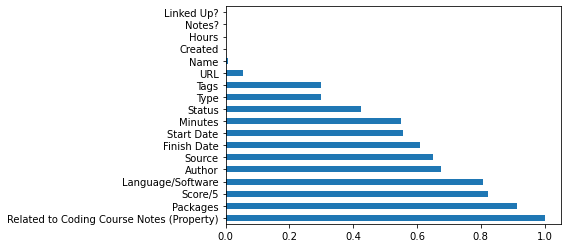

In [6]:
missing_percentages.plot(kind='barh')


### Changing Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type                                       106 non-null    object 
 1   Name                                       150 non-null    object 
 2   Language/Software                          29 non-null     object 
 3   Packages                                   13 non-null     object 
 4   Tags                                       106 non-null    object 
 5   Author                                     49 non-null     object 
 6   Created                                    151 non-null    object 
 7   Status                                     87 non-null     object 
 8   Score/5                                    27 non-null     object 
 9   URL                                        143 non-null    object 
 10  Source                    

In [8]:
#Minutes, Hours should be float
pd.to_numeric(df["Minutes"], errors='coerce').fillna(0)
pd.to_numeric(df["Hours"], errors='coerce').fillna(0)

0      4.000000
1      3.000000
2      0.213333
3      0.527500
4      0.333333
         ...   
146    0.466667
147    0.258500
148    0.125000
149    0.000000
150    0.933333
Name: Hours, Length: 151, dtype: float64

In [9]:
#Created, Finish Date, Start Date should be datetime
df['Created'] = pd.to_datetime(df["Created"], errors='raise', format="%B %d, %Y %I:%M %p")
df['Finish Date'] = pd.to_datetime(df["Finish Date"], errors='raise', format="%B %d, %Y")
df['Start Date'] = pd.to_datetime(df["Start Date"], errors='raise', format="%B %d, %Y")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Type                                       106 non-null    object        
 1   Name                                       150 non-null    object        
 2   Language/Software                          29 non-null     object        
 3   Packages                                   13 non-null     object        
 4   Tags                                       106 non-null    object        
 5   Author                                     49 non-null     object        
 6   Created                                    151 non-null    datetime64[ns]
 7   Status                                     87 non-null     object        
 8   Score/5                                    27 non-null     object        
 9   URL                  

In [213]:
df['Finish_Date'].dt.month_name()

AttributeError: 'Series' object has no attribute 'value_count'

In [12]:
df.tail()

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Score/5,URL,Source,Minutes,Finish Date,Start Date,Hours,Notes?,Linked Up?,Related to Coding Course Notes (Property)
146,Video,Data Science Project from Scratch - Part 2 (Da...,NaN,NaN,"DS Projects, Data Science",Ken Jee,2021-12-21 17:58:00,Finished,⭐️⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=GmW4F6MHqqs,NaN,28.00,2020-09-23,2020-09-23,0.466667,No,No,NaN
147,Video,(50) The Second Brain - A Life-Changing Produc...,NaN,NaN,Productivity,NaN,2021-12-21 17:58:00,Finished,NaN,https://www.youtube.com/watch?v=OP3dA2GcAh8,NaN,15.51,2020-09-25,2020-09-25,0.258500,No,No,NaN
148,Video,Data Science Project from Scratch - Part 1 (Pr...,NaN,NaN,"DS Projects, Data Science",Ken Jee,2021-12-21 17:58:00,Finished,⭐️⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=MpF9HENQjDo,NaN,7.50,2020-09-23,2020-09-23,0.125000,No,No,NaN
149,Book,Data Newbie to Guru: The Visual Guide to Learn...,NaN,NaN,"Data Science, SQL",Dr. Chantel Perry,2021-12-21 17:58:00,Started,NaN,NaN,NaN,NaN,NaT,2020-07-31,0.000000,No,No,NaN
150,Podcast,Build Your Brand in Data Science,NaN,NaN,Data Science,NaN,2021-12-21 17:58:00,NaN,NaN,https://podcasts.apple.com/us/podcast/50-ken-j...,NaN,56.00,NaT,2020-09-23,0.933333,No,No,NaN


I'll only be analyzing observations that I completed (Status = Finished) and that were done during the #66DaysofData challenge. Those are tagged #66DaysofData

### Dropping Unnecessary Columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Type                                       106 non-null    object        
 1   Name                                       150 non-null    object        
 2   Language/Software                          29 non-null     object        
 3   Packages                                   13 non-null     object        
 4   Tags                                       106 non-null    object        
 5   Author                                     49 non-null     object        
 6   Created                                    151 non-null    datetime64[ns]
 7   Status                                     87 non-null     object        
 8   Score/5                                    27 non-null     object        
 9   URL                  

In [14]:
df = df.drop(["Related to Coding Course Notes (Property)", "Linked Up?", "Notes?", "Score/5", "URL"], axis=1)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Type               106 non-null    object        
 1   Name               150 non-null    object        
 2   Language/Software  29 non-null     object        
 3   Packages           13 non-null     object        
 4   Tags               106 non-null    object        
 5   Author             49 non-null     object        
 6   Created            151 non-null    datetime64[ns]
 7   Status             87 non-null     object        
 8   Source             53 non-null     object        
 9   Minutes            68 non-null     float64       
 10  Finish Date        59 non-null     datetime64[ns]
 11  Start Date         67 non-null     datetime64[ns]
 12  Hours              151 non-null    float64       
dtypes: datetime64[ns](3), float64(2), object(8)
memory usage: 15.5+ K

# Renaming Columns

In [16]:
df.rename(columns = {'Finish Date': 'Finish_Date', 'Start Date': 'Start_Date'}, inplace = True)


In [17]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Source', 'Minutes', 'Finish_Date', 'Start_Date',
       'Hours'],
      dtype='object')

In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


2

In [19]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Packages             0.913907
Language/Software    0.807947
Author               0.675497
Source               0.649007
Finish_Date          0.609272
Start_Date           0.556291
Minutes              0.549669
Status               0.423841
Type                 0.298013
Tags                 0.298013
Name                 0.006623
Created              0.000000
Hours                0.000000
dtype: float64

<AxesSubplot:>

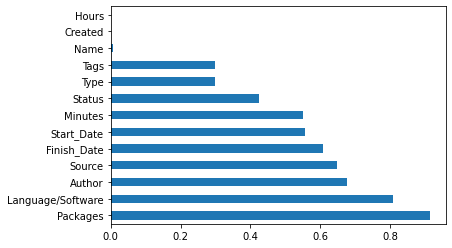

In [20]:
missing_percentages.plot(kind='barh')


In [21]:
df.describe()

,Minutes,Hours
count,68.000000,151.000000
mean,60.645147,0.455173
std,110.872873,1.334087
min,1.000000,0.000000
25%,9.832500,0.000000
50%,18.750000,0.000000
75%,56.250000,0.262583
max,739.900000,12.331667


In [22]:
df.head(3)

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
0,Course,Cleaning Data in Python,Python,NaN,NaN,NaN,2022-02-23 23:22:00,Not Started,DataCamp,240.0,NaT,2022-02-24,4.000000
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.0,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.8,2022-02-22,2022-02-22,0.213333


## Filter the df for status = finished and tag containing 66daysofdata

In [126]:
df = df[df["Tags"].str.contains("#66DaysofData", na=False)]
df.head()

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.00,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.80,2022-02-22,2022-02-22,0.213333
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,2022-02-22 17:47:00,Finished,YouTube,31.65,2022-02-22,2022-02-17,0.527500
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,2022-02-11 23:45:00,Finished,Medium,20.00,2022-02-12,2022-02-12,0.333333
5,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 20:35:00,Finished,NaN,5.00,2022-02-11,2022-02-11,0.083333


In [127]:
df = df[(df["Status"] == "Finished")]
df.head()

,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Source,Minutes,Finish_Date,Start_Date,Hours
1,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request","#66DaysofData, APIs, Importing Data, Python, R...",NaN,2022-02-23 00:18:00,Finished,DataCamp,180.00,2022-02-23,2022-02-23,3.000000
2,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,"#66DaysofData, Career, Round1, Tableau",Alex the Analyst,2022-02-23 00:06:00,Finished,YouTube,12.80,2022-02-22,2022-02-22,0.213333
3,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,"#66DaysofData, Round1, Tableau",Tableau Tim,2022-02-22 17:47:00,Finished,YouTube,31.65,2022-02-22,2022-02-17,0.527500
4,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,2022-02-11 23:45:00,Finished,Medium,20.00,2022-02-12,2022-02-12,0.333333
5,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,"#66DaysofData, Data Visualization, Round1",NaN,2022-02-11 20:35:00,Finished,NaN,5.00,2022-02-11,2022-02-11,0.083333


In [197]:
df['Language/Software'].unique()


array(['Python', 'Tableau', nan, 'GitHub', 'Excel'], dtype=object)

In [184]:
df['Hours'].sum()

32.086666666664996

Total hours consumed are 32.09

In [128]:
tag_count = df.copy()
tag_count = pd.concat([tag_count, df["Tags"].str.split(",", expand=True)], axis=1)
tag_count = tag_count.melt(id_vars=["Type", "Name", "Language/Software", "Packages", "Author","Status", "Source", "Hours", "Minutes", "Finish_Date"], value_vars=range(8), value_name="tag")
tag_count = tag_count[tag_count["tag"].notna()]
tag_count['tag'] = tag_count['tag'].str.strip()
tag_count


,Type,Name,Language/Software,Packages,Author,Status,Source,Hours,Minutes,Finish_Date,variable,tag
0,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request",NaN,Finished,DataCamp,3.000000,180.00,2022-02-23,0,#66DaysofData
1,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,Alex the Analyst,Finished,YouTube,0.213333,12.80,2022-02-22,0,#66DaysofData
2,Video,How to learn Tableau in 2022: Full platform gu...,Tableau,NaN,Tableau Tim,Finished,YouTube,0.527500,31.65,2022-02-22,0,#66DaysofData
3,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,Towards Data Science,Finished,Medium,0.333333,20.00,2022-02-12,0,#66DaysofData
4,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,NaN,Finished,NaN,0.083333,5.00,2022-02-11,0,#66DaysofData
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,5,Round1
264,Course,Intro to Data Visualization with Seaborn,Python,seaborn,NaN,Finished,DataCamp,4.000000,240.00,2022-01-18,6,seaborn
284,Article,Use Python To Scrape & Visualize Likes On Your...,Python,Selenium,Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.00,2021-12-31,6,Selenium
292,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.00,2022-01-12,6,matplotlib


In [129]:
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "#66DaysofData"])
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "Round 1"])
tag_count = tag_count.drop(tag_count.index[tag_count["tag"] == "Round1"])
tag_count

,Type,Name,Language/Software,Packages,Author,Status,Source,Hours,Minutes,Finish_Date,variable,tag
42,Course,Intermediate Importing Data in Python,Python,"BeautifulSoup, Tweepy, json, request",NaN,Finished,DataCamp,3.000000,180.0,2022-02-23,1,APIs
43,Video,Tableau Data Analyst Certification Review - 12...,Tableau,NaN,Alex the Analyst,Finished,YouTube,0.213333,12.8,2022-02-22,1,Career
45,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,pandas,Towards Data Science,Finished,Medium,0.333333,20.0,2022-02-12,1,Data Analysis
46,Article,Create Maps that Show Ratio or Aggregated Data...,Tableau,NaN,NaN,Finished,NaN,0.083333,5.0,2022-02-11,1,Data Visualization
47,Video,Tableau animation in five minutes - 5.1 mins,Tableau,NaN,NaN,Finished,YouTube,0.085000,5.1,2022-02-11,1,Data Visualization
...,...,...,...,...,...,...,...,...,...,...,...,...
220,Course,Introduction to Importing Data in Python,Python,"numpy, pandas, scipy, sqlalchemy",NaN,Finished,DataCamp,3.000000,180.0,2022-02-22,5,SQL
264,Course,Intro to Data Visualization with Seaborn,Python,seaborn,NaN,Finished,DataCamp,4.000000,240.0,2022-01-18,6,seaborn
284,Article,Use Python To Scrape & Visualize Likes On Your...,Python,Selenium,Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.0,2021-12-31,6,Selenium
292,Course,Intro to Data Visualization in Matplotlib,Python,matplotlib,NaN,Finished,DataCamp,4.000000,240.0,2022-01-12,6,matplotlib


### Tag

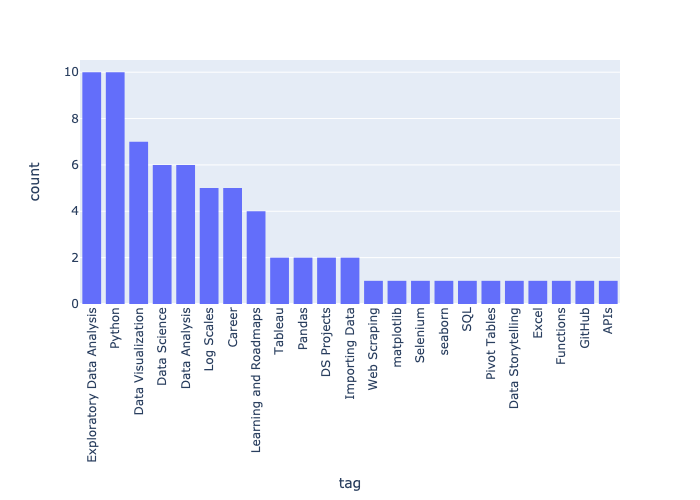

In [169]:
fig = px.histogram(tag_count, x="tag").update_xaxes(categoryorder="total descending", tickangle=-90)
fig.show("png")


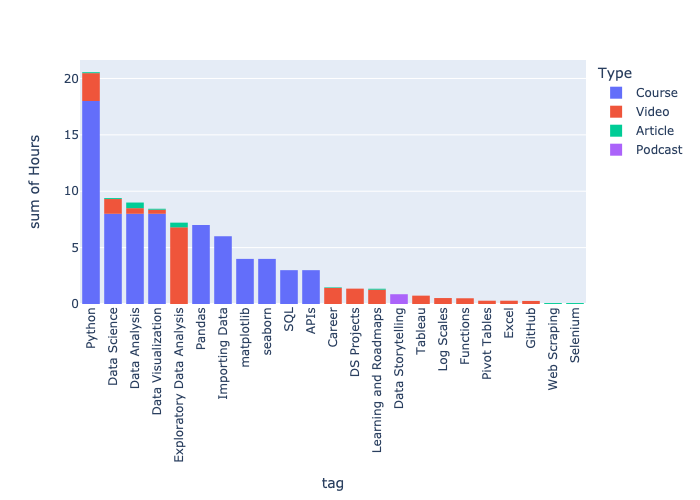

In [168]:
fig = px.histogram(tag_count, x="tag", y="Hours", color="Type").update_xaxes(categoryorder="total descending", tickangle=-90)
fig.show("png")


### Type

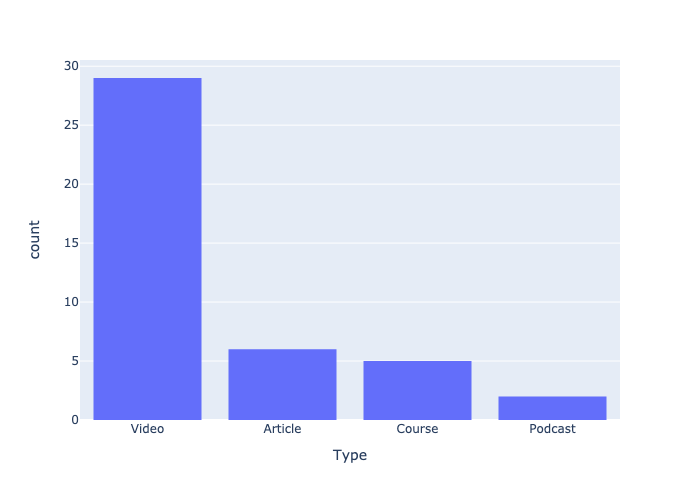

In [210]:
fig = px.histogram(df, x="Type").update_xaxes(categoryorder="total descending")
fig.show("png")


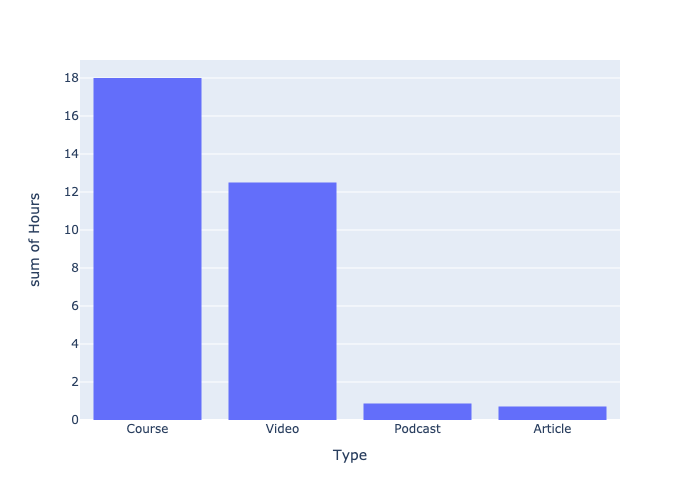

In [209]:
fig = px.histogram(df, x="Type", y="Hours").update_xaxes(categoryorder="total descending")
fig.show("png")


### Source

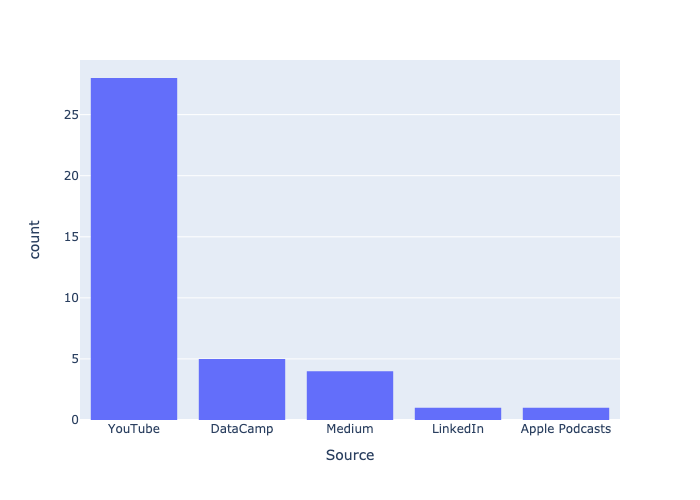

In [208]:
fig = px.histogram(df, x="Source").update_xaxes(categoryorder="total descending")
fig.show("png")


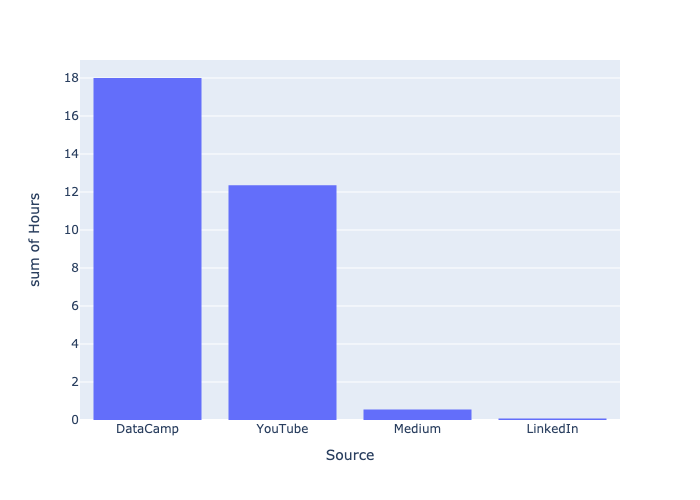

In [207]:
fig = px.histogram(df, x="Source", y="Hours").update_xaxes(categoryorder="total descending")
fig.show("png")


### Language/Software

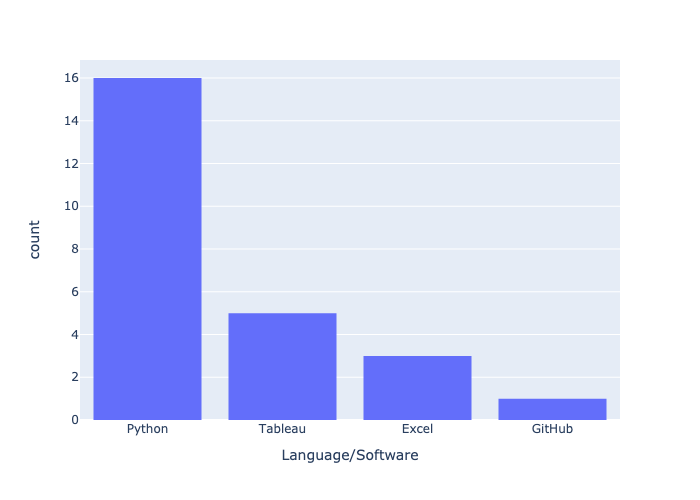

In [206]:
fig = px.histogram(df, x="Language/Software").update_xaxes(categoryorder="total descending")
fig.show("png")


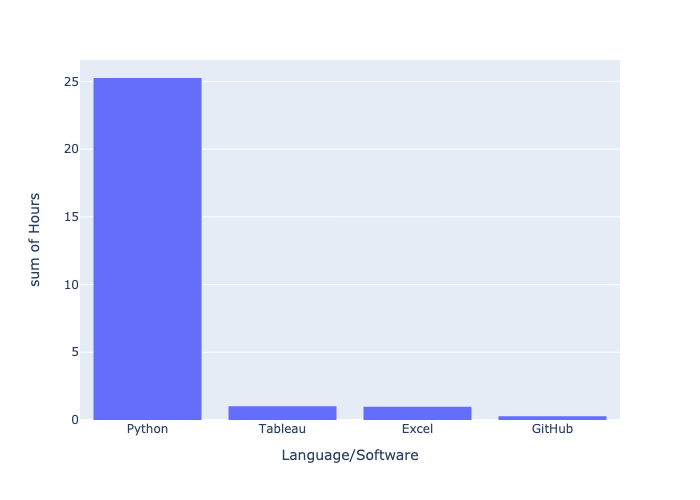

In [205]:
fig = px.histogram(df, x="Language/Software", y="Hours").update_xaxes(categoryorder="total descending")
fig.show("png")


### Author

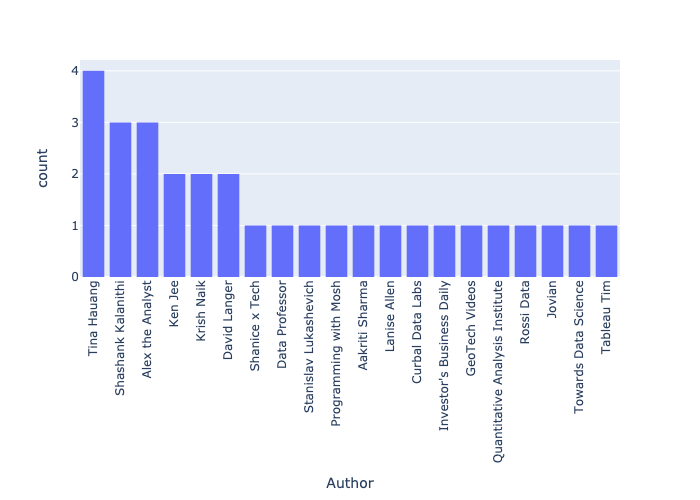

In [190]:
fig = px.histogram(df, x="Author").update_xaxes(categoryorder="total descending", tickangle=-90)
fig.show("png")


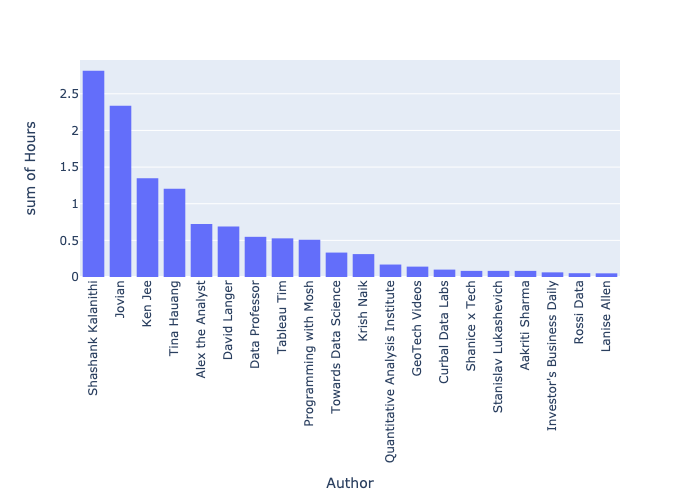

In [204]:
fig = px.histogram(df, x="Author", y="Hours").update_xaxes(categoryorder="total descending", tickangle=-90)
fig.show("png")


In [157]:
package_count = df.copy()
package_count = pd.concat([package_count, df["Packages"].str.split(",", expand=True)], axis=1)
package_count = package_count.melt(id_vars=["Type", "Name", "Language/Software", "Tags", "Author","Status", "Source", "Hours", "Minutes", "Finish_Date"], value_vars=range(4), value_name="packages")
package_count = package_count[package_count["packages"].notna()]
package_count['packages'] = package_count['packages'].str.strip()
package_count

,Type,Name,Language/Software,Tags,Author,Status,Source,Hours,Minutes,Finish_Date,variable,packages
0,Course,Intermediate Importing Data in Python,Python,"#66DaysofData, APIs, Importing Data, Python, R...",NaN,Finished,DataCamp,3.000000,180.0,2022-02-23,0,BeautifulSoup
3,Article,8 Ways to Filter Pandas Dataframes | by Soner ...,Python,"#66DaysofData, Data Analysis, Exploratory Data...",Towards Data Science,Finished,Medium,0.333333,20.0,2022-02-12,0,pandas
7,Video,Data Analysis on a Kaggle's Dataset - 29.9 mins,Python,"#66DaysofData, Data Analysis, Exploratory Data...",NaN,Finished,YouTube,0.498333,29.9,2022-02-10,0,pandas
10,Course,Introduction to Importing Data in Python,Python,"#66DaysofData, Importing Data, Pandas, Python,...",NaN,Finished,DataCamp,3.000000,180.0,2022-02-22,0,numpy
12,Course,Intro to Data Visualization with Seaborn,Python,"#66DaysofData, Data Analysis, Data Science, Da...",NaN,Finished,DataCamp,4.000000,240.0,2022-01-18,0,seaborn
18,Video,Build an Exploratory Data Analysis Project fro...,Python,"#66DaysofData, Exploratory Data Analysis, Round1",Jovian,Finished,YouTube,2.336667,140.2,2022-01-03,0,numpy
24,Video,How To Become Expertise in Exploratory Data An...,Python,"#66DaysofData, Exploratory Data Analysis, Round1",Krish Naik,Finished,YouTube,0.168333,10.1,2022-01-01,0,matplotlib
25,Video,Data Science Project from Scratch - Part 4 (Ex...,Python,"#66DaysofData, DS Projects, Exploratory Data A...",Ken Jee,Finished,YouTube,1.143333,68.6,2022-01-01,0,matplotlib
30,Video,Exploratory Data Analysis (comment your best i...,Python,"#66DaysofData, Exploratory Data Analysis, Pyth...",Shashank Kalanithi,Finished,YouTube,0.981667,58.9,2021-12-31,0,pandas
32,Article,Use Python To Scrape & Visualize Likes On Your...,Python,"#66DaysofData, Data Analysis, Data Science, Ex...",Stanislav Lukashevich,Finished,LinkedIn,0.083333,5.0,2021-12-31,0,Selenium


In [158]:
package_count["packages"].unique()

array(['BeautifulSoup', 'pandas', 'numpy', 'seaborn', 'matplotlib',
       'Selenium', 'Tweepy', 'json', 'scipy', 'request', 'sqlalchemy'],
      dtype=object)

### Packages

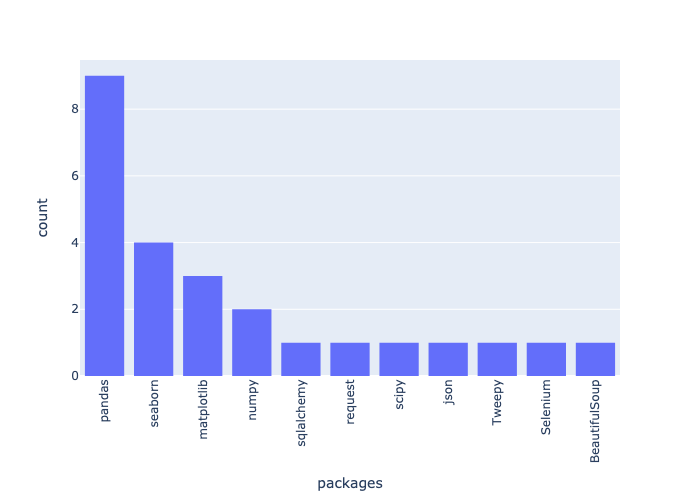

In [170]:
fig = px.histogram(package_count, x="packages").update_xaxes(categoryorder="total descending", tickangle=-90)
fig.show("png")


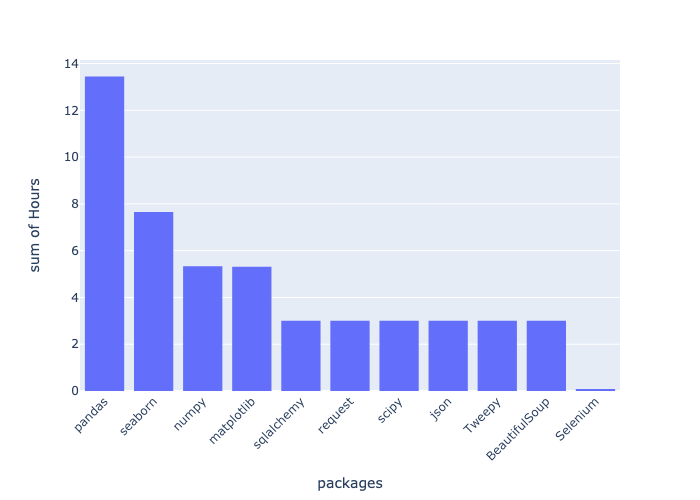

In [203]:
fig = px.histogram(package_count, x="packages", y="Hours").update_xaxes(categoryorder="total descending", tickangle=-45)
fig.show("png")

In [172]:
#tag_count = df.copy()
#tag_count = pd.concat([tag_count, df["Tags"].str.split(",", expand=True)], axis=1)
#tag_count = tag_count.melt(id_vars=["Type", "Name", "Source", "Hours", "Finish_Date", "Author", "Start_Date", "Language/Software", "Status"], value_vars=range(11), value_name="tag")
#tag_count = tag_count[tag_count["tag"].notna()]
#tag_count['tag'] = tag_count['tag'].str.strip() 
#tag_count

In [214]:
df['Finish_Date'].dt.month_name()


1     February
2     February
3     February
4     February
5     February
6     February
7     February
9     February
10    February
11    February
12    February
20     January
23     January
27     January
28     January
29     January
32     January
33     January
34     January
35     January
36     January
37     January
38     January
39     January
42     January
44     January
45     January
46     January
47     January
48    December
49    December
50    December
52    December
58    December
60    December
61    December
62    December
65    December
67    December
69         NaN
70     January
71    December
Name: Finish_Date, dtype: object

In [215]:
df['Finish_Date'].dt.day_name()

1     Wednesday
2       Tuesday
3       Tuesday
4      Saturday
5        Friday
6        Friday
7        Friday
9      Thursday
10    Wednesday
11       Sunday
12      Tuesday
20      Tuesday
23      Tuesday
27    Wednesday
28    Wednesday
29    Wednesday
32    Wednesday
33      Tuesday
34       Monday
35       Sunday
36       Sunday
37       Sunday
38       Sunday
39       Sunday
42     Saturday
44     Saturday
45     Saturday
46     Saturday
47     Saturday
48       Friday
49       Friday
50       Friday
52       Friday
58    Wednesday
60    Wednesday
61    Wednesday
62    Wednesday
65      Tuesday
67       Monday
69          NaN
70    Wednesday
71      Tuesday
Name: Finish_Date, dtype: object

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. Type
2. Start Date and Finish Date
3. Language/Software
4. Tags
5. Source
6. Author
7. Minutes

In [9]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Score/5', 'URL', 'Source', 'Minutes',
       'Finish Date', 'Start Date', 'Hours', 'Notes?', 'Linked Up?',
       'Related to Coding Course Notes (Property)', 'Property'],
      dtype='object')

In [10]:
df.pivot_table(values='Hours', index='Type', columns='Status')

Status,Finished,Not Started,Started
Type,,,
Article,0.102381,0.0,0.000000
Book,NaN,NaN,0.000000
Course,0.928033,NaN,3.266333
Podcast,0.908333,0.0,NaN
Tweet,0.016667,NaN,NaN
Video,0.470493,NaN,1.168333


## Ask and Answer Question

1. What type of resources did I consume the most? Quantity and time-wise.
    - 29 videos
    - 18 hours of course content
2. What days of the week did I finish most resources?
3. Who's my favorite author?
    - I consumed the highest amount of unique content from Tina Hauang, the YouTuber (4 videos).
    - Time-wise, I consumed more content from Shashank Kalanithi (2.8 hours or almost 10% of all of the hours in the dataset)
4. What was tagged the most?
    - Exploratory Data Analysis and Python were tied for the most tags with 10 each.
5. What was my total time spent on #66DaysofData?
    - 32.09 hours
6. What source did I use the most?
    - I spent the most time, 18 hours, on DataCamp.
7. Which python packages did I spend the most time on?
    - I spent around 13.5 hours on pandas, 7.5 hours on seaborn, and 5.3 hours on numpy

## Limitations:
- I did not give myself credit for any material that was started but not finished. For example if I watched half of a 50 minute YouTube video, none of those 25 minutes watched are counted. This leads to some underrepresentations of content consumed.
- Some content went over multiple topics, and this leads to an over-representation of content consumed. For example, if part of a one hour video went over numpy and the second part went over scipy, the analysis would show that an hour was consumed for numpy and an hour was consumed for scipy.
- There is inevitably missing data. Some videos I watched, articles I read didn't get input into the system.
- 
- 